In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

In [4]:
def sys_ode(t, u):
    du = [0]*4
    du[0] = u[2]
    du[1] = u[3]
    du[2] = - k0 * np.sqrt(u[2]**2 + u[3]**2)*u[2]/m
    du[3] = -g-k0*np.sqrt(u[2]**2 + u[3]**2)*u[3]/m
    return du

In [5]:
#main constants 
g = 9.8
m = 0.05

#initial position
x0 = 0
y0 = 1.5
v0 = 1.6
k0 = 0.0

t0 = 0 #initial time
T = 10
N = 2048
# interval fragmentation for numeric computation
t = np.linspace(t0,T, N)

angles = [np.pi/3,np.pi/4,np.pi/6,np.pi/8,np.pi/12,0]
labels = [r'$\frac{\pi}{3}$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{6}$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{12}$',r'$0$']

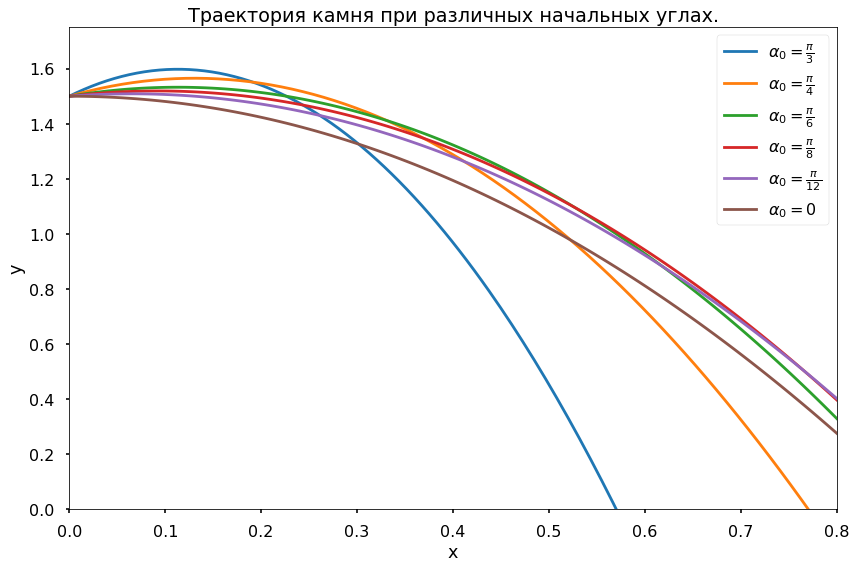

In [6]:
results = []

plt.figure(figsize=(12,8))

for i, alpha in enumerate(angles):
    # initial conditions
    u0 = [x0, y0, v0*np.cos(alpha), v0*np.sin(alpha)]
    
    #Solve ODE with initial conditions
    sol = solve_ivp(sys_ode, [t0, T], u0, t_eval=t)
    
    # Save the solution in @results
    results.append(sol.y.T)
    x = sol.y.T[:,0]
    y = sol.y.T[:,1]
    
    #draw_set = x<=0.26 #np.logical_and(x<=0.2,y>-8)
    #plt.plot(x[draw_set],y[draw_set],label=r'$\alpha_0 = $'+labels[i])
    
    plt.plot(x,y,label=r'$\alpha_0 = $'+labels[i])
    
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,0.95)
plt.ylim(0,1.75)
plt.legend()
plt.title(r"Траектория камня при различных начальных углах.")

plt.tight_layout()

#plt.savefig("graph_many.png",dpi=300)
plt.show()

In [7]:
def y_without_res(x,alpha):
    return y0 + x * np.tan(alpha) - x**2 * (g / (2*(np.cos(alpha)**2) * (v0**2)))

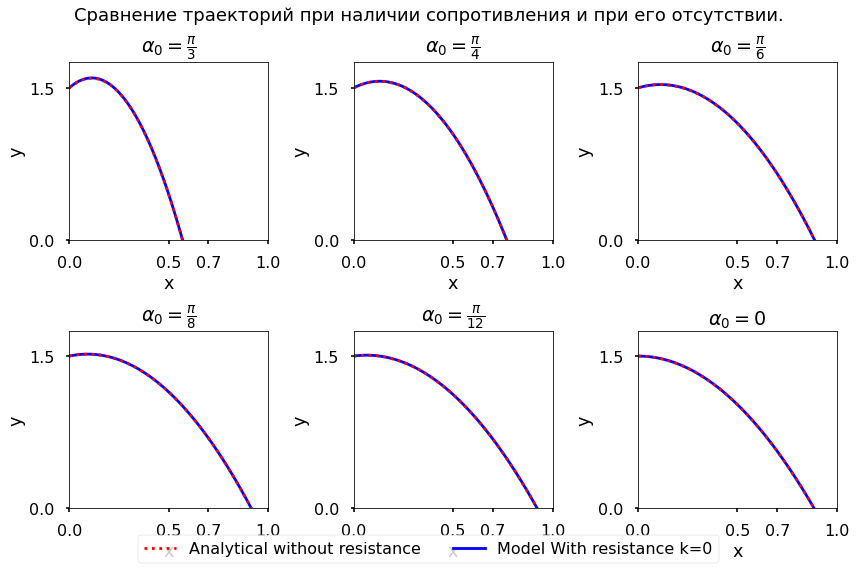

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))

l1 = Line2D([0],[0],linestyle=':',color='red')
l2 = Line2D([0],[0],linestyle='-',color='blue')
line_labels = ["Analytical without resistance","Model With resistance k=0"]

for i, alpha in enumerate(angles):
    data = results[i]
    x = data[:,0]
    y = data[:,1]
    
    xx = np.linspace(x0,2,50)
    yy = y_without_res(xx,alpha)
    
    axi = ax[int(i/3),i%3]
    axi.plot(x,y,'b-')
    axi.plot(xx,yy,'r:')
    axi.set_xlim(0,1)
    axi.set_ylim(0,1.75)
    
    axi.set_xticks([0,0.5,0.7,1])
    axi.set_yticks([0,1.5])
    
    axi.set_title(r'$\alpha_0 = $'+labels[i])
    axi.set_xlabel("x")
    axi.set_ylabel("y")
    
fig.legend(handles=[l1, l2],
           labels=line_labels,
           bbox_to_anchor=(0.5,0),
           loc="lower center",
           ncol=2
          )
fig.suptitle("Сравнение траекторий при наличии сопротивления и при его отсутствии.",fontsize=18)
plt.tight_layout()

plt.savefig("separated_graph.png",dpi=300)
plt.show()

In [102]:
?fig.legend

## Дальность с точносностью $\epsilon = 0.1$

In [10]:
def Xmax_without_res(angle):
    return (v0*np.sin(angle) + np.sqrt(v0**2 * np.sin(angle)**2 + 2*g*y0))*(v0*np.cos(angle)) / g

In [11]:
eps = 0.1
print_list = ['pi/3','pi/4','pi/6','pi/8','pi/12','0']
print("Angle \t D_with_res \t D_without_res\n")
for i, alpha in enumerate(angles):
    data = results[i]
    x = data[:,0]
    y = data[:,1]
    search_y = y - eps <  0
    
    Xmax_with_res = round(x[search_y][0],2)
    Xmax_no_res = round(Xmax_without_res(alpha),2)
    
    print(f'{print_list[i]} \t {Xmax_with_res} \t\t {Xmax_no_res}\n')
    

Angle 	 D_with_res 	 D_without_res

pi/3 	 0.56 		 0.57

pi/4 	 0.75 		 0.77

pi/6 	 0.87 		 0.89

pi/8 	 0.89 		 0.92

pi/12 	 0.9 		 0.92

0 	 0.86 		 0.89



## Максисальная скорость

In [12]:
def speed(t,angle):
    vx = v0 * np.cos(angle)
    vy = v0 * np.sin(angle) - g*t
    return np.sqrt((vx**2 + vy**2))

def vmax_without_res(angle):
    t_lim = (v0 * np.sin(angle) + np.sqrt(v0**2 * np.sin(angle)**2 + 2 * g * y0)) / g
    return max(v0,speed(t_lim,angle))

In [13]:
vmax_without_res(0)

5.653317610041028

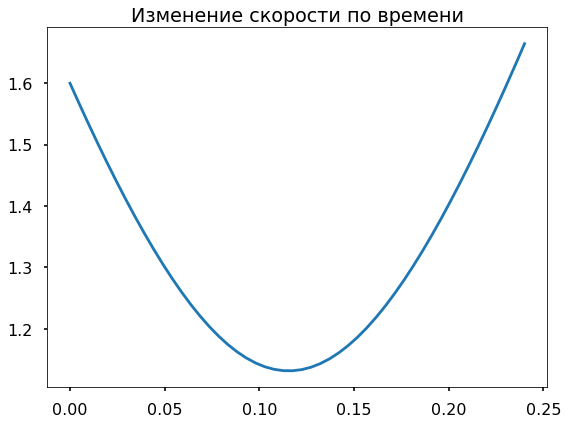

In [127]:
plt.figure(figsize=(8,6))
tt = np.linspace(0,0.240,50)
plt.plot(tt,v(tt,np.pi/4))
plt.title("Изменение скорости по времени")
plt.tight_layout()
plt.savefig("speed.png")
plt.show()

In [15]:
print("Угол \t Сопрот. к=0 \t аналитическая\n")

for i, alpha in enumerate(angles):
    data = results[i]
    y = data[:,1]
    pos_y = y >  0
    
    vx = data[:,2]
    vy = data[:,3]
    vx = vx[pos_y]
    vy = vy[pos_y]
    
    v = np.sqrt(vx**2 + vy**2)
    
    Vmax_with_res = round(np.max(v),2)
    Vmax_no_res = round(vmax_without_res(alpha),2)
    
    print(f'{print_list[i]} \t {Vmax_with_res} \t\t {Vmax_no_res}\n')
    

Угол 	 Сопрот. к=0 	 аналитическая

pi/3 	 5.61 		 5.65

pi/4 	 5.64 		 5.65

pi/6 	 5.64 		 5.65

pi/8 	 5.62 		 5.65

pi/12 	 5.64 		 5.65

0 	 5.64 		 5.65

